# Does the number of languages offered for a title impact the hidden gem score/ various scores?

In [15]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Study data files
netflix_data_path = "../ed_netflix/netflix_language.csv"

# Read the mouse data and the study results
netflix_data = pd.read_csv(netflix_data_path)
netflix_data

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Spanish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
2,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,70632.0,5/8/20 0:00,3/4/21 0:00,2838.0
3,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,12/3/20 0:00,3/3/21 0:00,131.0
4,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,6/14/11 0:00,3/3/21 0:00,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14311,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...",Portuguese,Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,PG-13,6.2,65.0,57.0,NaN,11.0,57231747.0,4/23/04 0:00,4/14/15 0:00,167842.0
14312,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Not Rated,6.2,89.0,65.0,1.0,NaN,NaN,1/22/10 0:00,4/14/15 0:00,878.0
14313,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,NaN,7.3,NaN,NaN,NaN,NaN,NaN,9/17/88 0:00,4/14/15 0:00,14.0
14314,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,1-2 hour,NaN,7.8,NaN,NaN,NaN,NaN,NaN,1/13/12 0:00,4/14/15 0:00,174.0


In [16]:
netflix_data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Swedish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Spanish,Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
2,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,70632.0,5/8/20 0:00,3/4/21 0:00,2838.0
3,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,12/3/20 0:00,3/3/21 0:00,131.0
4,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,6/14/11 0:00,3/3/21 0:00,47.0


In [17]:
netflix_data.tail()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
14311,13 Going on 30,"Comedy, Fantasy, Romance","Romantic Comedies,Comedies,Romantic Films,Roma...",Portuguese,Movie,3.1,"Hungary,Lithuania,Romania,United Kingdom,Belgi...",1-2 hour,PG-13,6.2,65.0,57.0,NaN,11.0,57231747.0,4/23/04 0:00,4/14/15 0:00,167842.0
14312,LIFE 2.0,Documentary,"Social & Cultural Documentaries,Biographical D...",English,Movie,8.2,"Hungary,Lithuania,India,Australia,United Kingd...",1-2 hour,Not Rated,6.2,89.0,65.0,1.0,NaN,NaN,1/22/10 0:00,4/14/15 0:00,878.0
14313,Brand New Day,"Documentary, Music","Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,NaN,7.3,NaN,NaN,NaN,NaN,NaN,9/17/88 0:00,4/14/15 0:00,14.0
14314,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,1-2 hour,NaN,7.8,NaN,NaN,NaN,NaN,NaN,1/13/12 0:00,4/14/15 0:00,174.0
14315,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0


In [18]:
#print data types
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14316 entries, 0 to 14315
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  14316 non-null  object 
 1   Genre                  14291 non-null  object 
 2   Tags                   14260 non-null  object 
 3   Languages              14316 non-null  object 
 4   Series or Movie        14316 non-null  object 
 5   Hidden Gem Score       14306 non-null  float64
 6   Country Availability   14294 non-null  object 
 7   Runtime                14315 non-null  object 
 8   View Rating            10977 non-null  object 
 9   IMDb Score             14308 non-null  float64
 10  Rotten Tomatoes Score  9139 non-null   float64
 11  Metacritic Score       7231 non-null   float64
 12  Awards Received        8692 non-null   float64
 13  Awards Nominated For   10392 non-null  float64
 14  Boxoffice              6702 non-null   float64
 15  Re

In [19]:
# Remove the rows with missing data, if any!
clean_netflix_data_df = netflix_data.dropna(how="any")
clean_netflix_data_df.count()
clean_netflix_data_df["Languages"].value_counts()

English       2140
French         336
Spanish        329
German         188
Russian        137
              ... 
Papiamento       1
Croatian         1
Syriac           1
Aramaic          1
Quenya           1
Name: Languages, Length: 126, dtype: int64

In [20]:
netflix_language_df = clean_netflix_data_df.groupby(by="Title")["Languages"].count()

In [21]:
language = netflix_language_df.to_frame()
language.rename(columns={"Languages":"Number of Languages"},inplace=True)
language
# netflix_language_df.reset_index(inplace=True)
# netflix_language_df

,Number of Languages
Title,
12 Monkeys,2
12 Years a Slave,1
127 Hours,2
12:08 East of Bucharest,1
17 Again,1
...,...
[Rec] 3: Genesis,3
conjuring 2,1
"sex, lies, and videotape",1


In [22]:
netflix_country = pd.read_csv('../ed_netflix/netflix_country.csv')

In [23]:
newnetflix = netflix_country[['Title','Country Availability', 'Hidden Gem Score', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score']]
newnetflix

,Title,Country Availability,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score
0,Lets Fight Ghost,Thailand,4.3,7.9,98.0,82.0
1,HOW TO BUILD A GIRL,Canada,7.0,5.8,79.0,69.0
2,The Con-Heartist,Thailand,8.6,7.4,NaN,NaN
3,Gleboka woda,Poland,8.7,7.5,NaN,NaN
4,Only a Mother,Lithuania,8.3,6.7,NaN,NaN
...,...,...,...,...,...,...
122890,DreamWorks Happy Holidays from Madagascar,Brazil,8.4,6.8,NaN,NaN
122891,DreamWorks Happy Holidays from Madagascar,Netherlands,8.4,6.8,NaN,NaN
122892,DreamWorks Happy Holidays from Madagascar,Italy,8.4,6.8,NaN,NaN
122893,DreamWorks Happy Holidays from Madagascar,Israel,8.4,6.8,NaN,NaN


In [24]:
fullset = pd.merge(newnetflix, language, how='inner', on='Title')
fullset

,Title,Country Availability,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Number of Languages
0,Lets Fight Ghost,Thailand,4.3,7.9,98.0,82.0,2
1,Joker,Lithuania,3.5,8.4,68.0,59.0,2
2,Joker,Poland,3.5,8.4,68.0,59.0,2
3,Joker,France,3.5,8.4,68.0,59.0,2
4,Joker,Italy,3.5,8.4,68.0,59.0,2
...,...,...,...,...,...,...,...
19922,The Twilight Saga: Breaking Dawn: Part 1,Argentina,2.0,4.9,25.0,45.0,2
19923,The Twilight Saga: Breaking Dawn: Part 1,Brazil,2.0,4.9,25.0,45.0,2
19924,The Twilight Saga: Breaking Dawn: Part 1,Colombia,2.0,4.9,25.0,45.0,2
19925,The Twilight Saga: Breaking Dawn: Part 1,Spain,2.0,4.9,25.0,45.0,2


In [25]:
group = fullset.groupby(by="Number of Languages").mean()
group2=group.reset_index()
group2

,Number of Languages,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score
0,1,3.503437,6.810965,67.530115,61.742418
1,2,3.399213,6.812921,64.044241,59.637080
2,3,3.714857,6.936924,65.801954,61.350158
3,4,3.475479,7.066130,67.948905,62.866991
4,5,3.609563,7.149064,68.903226,64.858065
5,6,3.225538,7.011692,64.190769,60.409231
6,7,3.176106,7.012389,58.214286,61.178571
7,8,4.110638,6.502128,67.574468,58.127660
8,9,3.544444,6.337963,64.388889,55.597222
9,10,2.970588,6.391176,57.647059,58.117647


In [26]:
group2.mean()

Number of Languages       7.461538
Hidden Gem Score          3.502297
IMDb Score                6.917796
Rotten Tomatoes Score    66.941839
Metacritic Score         62.452696
dtype: float64

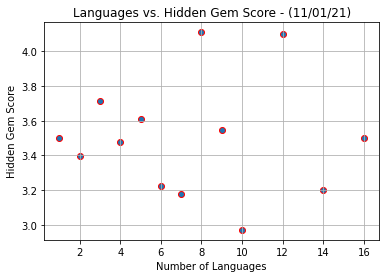

In [27]:
plt.scatter(group2["Number of Languages"], group2["Hidden Gem Score"], alpha=1.0, edgecolor='red')
plt.title(f"Languages vs. Hidden Gem Score - ({time.strftime('%D')})")
plt.xlabel("Number of Languages")
plt.ylabel("Hidden Gem Score")
plt.grid(True)
plt.show()

# Correlation and Regression

In [28]:


# use the pearson formula and the average calculated above to determin p-value.
# if r-value is close to 1, there is a high degree of correlation 
# if r-value is close to 0, there is no correlation
# if r-value is close to -1 suggests there is negative correlation

correlation_coeff = round(st.pearsonr(group2['Number of Languages'], group2['Hidden Gem Score'])[0], 4)
correlation_coeff

-0.0134

In [29]:
#we can find the a linear model using st.linregression
linear_model = st.linregress(group2['Number of Languages'], group2['Hidden Gem Score'])
linear_model

LinregressResult(slope=-0.0009707486440445032, intercept=3.509540544986627, rvalue=-0.013378912561996513, pvalue=0.9653993899894905, stderr=0.02187513605177536, intercept_stderr=0.19002624663153414)

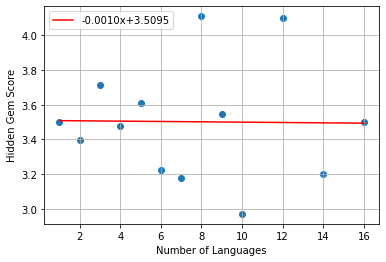

In [33]:
#linear regression model 
slope=-0.0009707486440445032
intercept=3.509540544986627

regression_model = slope*(group2['Number of Languages']) + intercept
plt.scatter(group2['Number of Languages'], group2['Hidden Gem Score'])
plt.plot(group2['Number of Languages'], regression_model, 'r', label='{:.4f}x+{:.4f}'.format(slope, intercept))
plt.legend()
plt.xlabel('Number of Languages')
plt.ylabel('Hidden Gem Score')
plt.grid(True)
plt.show()

In [31]:
# Set x axis and tick locations
x_axis = np.arange(len(group2))
tick_locations = [value+0.4 for value in x_axis]

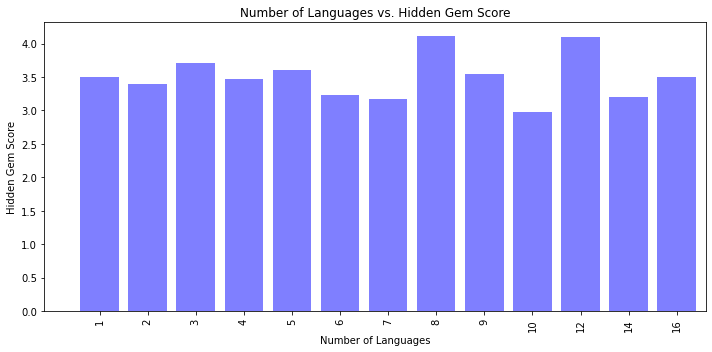

In [32]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, group2["Hidden Gem Score"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, group2["Number of Languages"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(group2["Number of Languages"])+2)

plt.title("Number of Languages vs. Hidden Gem Score")
plt.xlabel("Number of Languages")
plt.ylabel("Hidden Gem Score")
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../ed_netflix/GemScore.png")
plt.show()